In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD # Optimizer
import numpy as np

Text(0.5, 1.0, 'Image Label: 0')

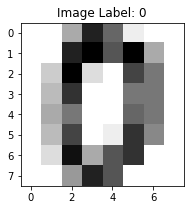

In [15]:
# Prepare the data
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

sample_idx = 0

plt.figure(figsize=(3,3))
plt.imshow(digits.images[sample_idx], cmap=plt.cm.gray_r,
          interpolation='nearest')

plt.title(f"Image Label: {digits.target[sample_idx]}")

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.15,
                                                   random_state=37)
# We put a random state to have reproducible results

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train) # Center and normalize
X_test = scaler.fit_transform(X_test)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1527, 64), (1527,)), ((270, 64), (270,)))

In [115]:
from torch.utils.data import DataLoader

def gen_dataset(x, y, batch_size=32):
    train_data = []
    for i in range(len(x)):
        train_data.append([x[i], y[i]])
        
    return DataLoader(train_data, batch_size=batch_size, shuffle=True)

def apply_activation(activation, z_n):
    dic = {
        "relu": nn.ReLU,
        "sigmoid": nn.Sigmoid,
        "softmax": nn.Softmax,
        "tanh": nn.Tanh,
        # Add more of your functions if you need
    }
    return dic[activation](z_n) # Put your parameters if needed

def accuracy(y_pred, y):
    return np.mean(np.argmax(y_pred, axis=1) == y)

def test_model(model, x, y):
    dataset = gen_dataset(x, y)
    preds, targets = [], []
    for batch_x, batch_y in dataset:
        preds.append(model(batch_x).detach().numpy())
        targets.append(batch_y.numpy())
     
    preds, targets = np.concatenate(preds), np.concatenate(targets)
    return accuracy(preds, targets)

In [116]:
class L_Layer_Model:
    def __init__(self, layers):
        orderedDic
        
        
        self.model = nn.Sequential(
            nn.Linear(layers[0], layers[1]),
            nn.ReLU(),
            nn.Linear(layers[1], layers[2])
        )
    def __call__(self, inputs):
        return self.model(inputs)
    
    def train(self, x, y, 
              num_epochs=10, 
              learning_rate=0.1,
              loss_fn=nn.CrossEntropyLoss()):
        train_dl = gen_dataset(x, y)
        
        for e in range(num_epochs):
            for (inputs, targets) in train_dl:
                y_pred = self.model(inputs)
                
                loss = loss_fn(y_pred, targets.to(dtype=torch.long))

                self.model.zero_grad()

                loss.backward()
                with torch.no_grad():
                    for param in self.model.parameters():
                        param -= learning_rate * param.grad
                        
    def predict(self, x):
        return self.model(x)

In [118]:
layers = [X_train.shape[1], 15, 10]

model = L_Layer_Model([X_train.shape[1], 15, 10])
print("Accuracy before train: ", test_model(model, X_test, y_test))

model.train(X_train, y_train)

print("Accuracy after train: ", test_model(model, X_test, y_test))

Accuracy before train:  0.05925925925925926
Accuracy after train:  0.9629629629629629
